# Feature Engineering-Handling Missing Values(Day-2)

# Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to      replace NAN values(It is similar to mean/median imputation)

When should it used?
It should be used when data is missing completely at random

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)

In [2]:
df = pd.read_csv("titanic.csv", usecols=["Age", "Fare", "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.shape

(891, 3)

In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()  # percentage of missing values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
df["Age"].isnull().sum()  # adding all the NAN values

177

In [7]:
df["Age"].dropna().sample()  # It will pick up a random value from the dataset (excluding all the NAN values)

685    25.0
Name: Age, dtype: float64

In [8]:
df["Age"].dropna().sample(df["Age"].isnull().sum(), random_state = 0)  # filling all the NAN values with random values

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
382    32.00
824     2.00
682    20.00
591    52.00
614    35.00
197    42.00
1      38.00
512    36.00
640    20.00
830    15.00
225    22.00
391    21.00
621    42.00
102    21.00
756    28.00
777     5.00
261     3.00
655    24.00
590    35.00
403    28.00
822    38.00
345    24.00
666    25.00
218    32.00
772    57.00
729    25.00
446    13.00
442    25.00
570    62.00
35     42.00
332    38.00
631    51.00
312    26.00
441    20.00
504    16.00
251    29.00
609    40.00
812    35.00
297     2.00
97     23.00
212    22.00
390    36.00
417    18.00
558    39.00
195    58.00
681    27.00
677    18.00

In [9]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    
    #It will have the random sample value to fill NAN values
    random_sample = df["Age"].dropna().sample(df["Age"].isnull().sum(), random_state = 0)
    
    # Pandas need to have the same index to merge the dataset
    random_sample.index = df[df[variable].isnull()].index  # checking which indexes has the NAN values(matching the NAN values and random sample a value index)
    df.loc[df[variable].isnull(), variable+"_random"]= random_sample  # df.loc[rows, columns]

In [10]:
median = df["Age"].median()
median

28.0

In [11]:
impute_nan(df, "Age", median)

In [12]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


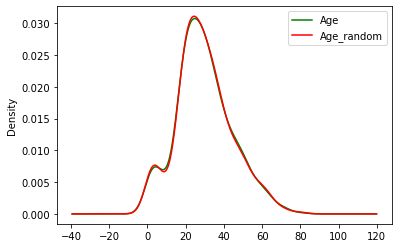

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind = "kde", ax = ax, color = "green")
df["Age_random"].plot(kind="kde", ax=ax, color="red")
# plt.legend()
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")
 #In random imputation almost the Age and Age_random are same after the Random sample imputation , where as in mean/median imputation there is a change in the variance

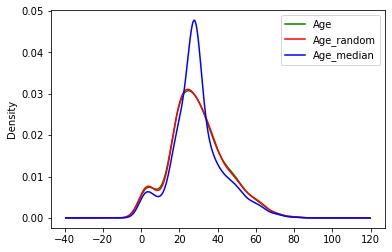

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind = "kde", ax = ax, color = "green")
df["Age_random"].plot(kind="kde", ax=ax, color="red")
df["Age_median"].plot(kind = "kde", ax=ax, color = "blue")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

# Advantages
## 1)Easy to implement
## 2) very less distortion in variance
## Random sample imputation > mean/median imputation

# Disadvantages
## 3) Every situation randomness wont work